__Homework 1: Logistic Regression Implementation__

Michael Anderson (anderm18)

__Task 1: Describe a machine learning problem that you would like to solve using Logistic Regression. Clearly state why Logistic regression is the best choice for solving this problem.__

I decided to solve the problem of email spam detection. I think this is a more simple problem to solvlve as I'm completely new to this Logistic Regression stuff! Anyways, Logistic Regression is the best choice for solving this problem as it is a problem with binary solutions - Spam/Not Spam (or as some may say, Ham!). Using Linear Regression for this problem would not make much sense as we aren't trying to extrapolate a new value - like a stock prediction - we are instead trying to predict a Yes or No question.

__Task 2: Pick a publicly available dataset (except The Titanic Dataset because we already discussed that in class) that you will use to solve this problem. You must provide a link to the dataset and perform necessary Exploratory Data Analysis (EDA). Clearly demonstrate the steps you follow for your EDA with a justification of why these were required. For example, if the dataset has lot of missing values, then why did you use a specific technique when handling missing data. This task may include data visualization (Check this link: https://www.geeksforgeeks.org/top-8-python-libraries-for-data-visualization/).__

For this problem, I will be using a Public Dataset I found on Kaggle called __Email-Non-Linear-Spam__ (https://www.kaggle.com/datasets/shrutipandit707/emailnonlinearspam)

In [1]:
!pip install pandas

We can start by simply importing pandas, the library I'll be using for the Exploratory Data Analysis!

In [314]:
import pandas as pd

Now, we can use the `.read_csv()` function from pandas we learned about in class to read in our Spam/Ham dataset. I did some more research to learn some more about the attributes in workings of the `DataFrame` in pandas (outside of the abstract definition in the documentation), and found it to be a pretty simple implementation of a straightforward Data Table. In this cell I also display the head of the table, just to see that the data was processed correctly.

In [315]:
data = pd.read_csv('loan-train.csv')
test = pd.read_csv('loan-test.csv')
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


The most important part of Exploratory Data Analysis (EDA) is first checking and dealing with nulls, NaNs, and other holes in our data. Initially, I thought the best way to go about this was to use `.interpolate()` if there weren't many holes, but to just get rid of the holes in the data if there were too many (`.dropna()`). I figured that if I had a few artificially inserted data that it wouldn't make too much of a difference in my implementation of the agent, but if I had too many artificial inserts this could significantly change the outcome of my product. First things first, though, let's check for any of those values:

In [316]:
data.isna()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,False,False,False,False,False,False,False,False,True,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,False,False,False,False,False,False,False,False,False,False,False,False,False
610,False,False,False,False,False,False,False,False,False,False,False,False,False
611,False,False,False,False,False,False,False,False,False,False,False,False,False
612,False,False,False,False,False,False,False,False,False,False,False,False,False


In [317]:
del data["Loan_ID"]
del data["Property_Area"]

data.dropna()
data["Dependents"] = data["Dependents"].map({'0': 0, '1': 1, '2':2, '3+': 3})
data["Gender"] = data["Gender"].map({'Male': 1, 'Female':0})
data["Married"] = data["Married"].map({'Yes': 1, 'No':0})
data['Loan_Status'] = data['Loan_Status'].map({'Y': 1, 'N': 0})
data['Self_Employed'] = data['Self_Employed'].map({'Yes': 1, 'No': 0})
data["Education"] = data["Education"].map({'Graduate': 1, 'Not Graduate':0})

In [318]:
del test["Loan_ID"]
del test["Property_Area"]

test.dropna()
test["Dependents"] = test["Dependents"].map({'0': 0, '1': 1, '2':2, '3+': 3})
test["Gender"] = test["Gender"].map({'Male': 1, 'Female':0})
test["Married"] = test["Married"].map({'Yes': 1, 'No':0})
test['Self_Employed'] = test['Self_Employed'].map({'Yes': 1, 'No': 0})
test["Education"] = test["Education"].map({'Graduate': 1, 'Not Graduate':0})

In [319]:
data.head()
data.dropna()
data.interpolate(inplace=True)

Well, luckily it doesn't look like we have any missing data here. I did some research on `.isna()` and it seems that it always displays the `True` values for holes in data, and since there are now other values being displayed here other than `False`. For the sake of including this step, I've included commented out code in the cell below showing the commands I'd use to do a fill or a delete for that missing data (if it existed), as well as another way to check every column for null or missing values:

In [320]:
data.isna().sum()
# If there are few missing values:
#    data.dropna()

# If there are many missing values, interpolate:
#    data.interpolate()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           1
Loan_Amount_Term     0
Credit_History       0
Loan_Status          0
dtype: int64

I also think it is important to view a summary the entire dataset, so that we know what kind of numbers we are working with (small, large, do we have to worry about overflows? etc.) so, all I'm doing here is having a look at the numbers. Generally, it looks as if we are dealing with smaller numbers, apart from the capital_run_length_longest and capital_run_length_total columns. We can also see here our action space of 0 and 1 in the spam column!

In [323]:
data.drop(index=0, inplace=True)
data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
1,1.0,1.0,1.0,1,0.0,4583,1508.0,128.0,360.0,1.0,0
2,1.0,1.0,0.0,1,1.0,3000,0.0,66.0,360.0,1.0,1
3,1.0,1.0,0.0,0,0.0,2583,2358.0,120.0,360.0,1.0,1
4,1.0,0.0,0.0,1,0.0,6000,0.0,141.0,360.0,1.0,1
5,1.0,1.0,2.0,1,1.0,5417,4196.0,267.0,360.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...
609,0.0,0.0,0.0,1,0.0,2900,0.0,71.0,360.0,1.0,1
610,1.0,1.0,3.0,1,0.0,4106,0.0,40.0,180.0,1.0,1
611,1.0,1.0,1.0,1,0.0,8072,240.0,253.0,360.0,1.0,1
612,1.0,1.0,2.0,1,0.0,7583,0.0,187.0,360.0,1.0,1


Just to reinforce what I mentioned above about knowing what kind of numbers we are dealing with, below is a just a graph to find our mins and maxs among every column. We can see that the highest value in this table is ~16000, and the lowest value is 0, so good to know there are no negatives that could potentially cause some issues with my mathematics below.


<AxesSubplot:>

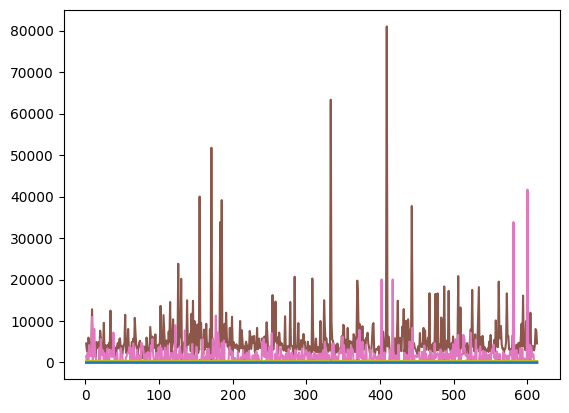

In [324]:
data.plot(legend=False)
# data.plot()

With this pre-processing, I think our DataFrame is ready to go! Now, let's seperate the data table into x data (everything except for the result) and y data (the result 0 or 1 for spam/ham). We can do this using `.pop("spam")` which will remove the spam column from data, but we can catch the removed value into its own DataFrame using the `=` operator. 

In [325]:
Y_data = data.pop("Loan_Status")
X_data = data

In [326]:
Y_data

1      0
2      1
3      1
4      1
5      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 613, dtype: int64

In [338]:
X_data
X_data.insert(0, "one", 1, True)

In [341]:
X_data

,one,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
1,1,1.0,1.0,1.0,1,0.0,4583,1508.0,128.0,360.0,1.0
2,1,1.0,1.0,0.0,1,1.0,3000,0.0,66.0,360.0,1.0
3,1,1.0,1.0,0.0,0,0.0,2583,2358.0,120.0,360.0,1.0
4,1,1.0,0.0,0.0,1,0.0,6000,0.0,141.0,360.0,1.0
5,1,1.0,1.0,2.0,1,1.0,5417,4196.0,267.0,360.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
609,1,0.0,0.0,0.0,1,0.0,2900,0.0,71.0,360.0,1.0
610,1,1.0,1.0,3.0,1,0.0,4106,0.0,40.0,180.0,1.0
611,1,1.0,1.0,1.0,1,0.0,8072,240.0,253.0,360.0,1.0
612,1,1.0,1.0,2.0,1,0.0,7583,0.0,187.0,360.0,1.0


In [342]:
Y_data.isna().sum()

0

In [343]:
X_data.isna().sum()

one                  0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
dtype: int64

In [457]:
from sklearn.model_selection import train_test_split
X1, X2, Y1, Y2 = train_test_split(X_data, Y_data)

__Task 3: Implement, Logistic Regression in this step. Clearly write your cost function
and derivatives before implementing gradient descent. Do not use any built-in packages for this
step. You can use the vectorization techniques demonstrated in class. Implement any 2 variants
of gradient descent in their original form. (Refer to the research paper discussed in class).__

In [458]:
import math
import warnings
import numpy as np

In [603]:
class LogisticRegress():
    
    def __init__(self, X_dat, Y_dat, learning_rate=2.0e-9):
        n1, n2 = X_dat.shape
        self.weights = np.zeros(n2)
        self.b = 0.0
        self.learning_rate = learning_rate
        self.X = X_dat
        self.Y = Y_dat
        
    def sigmoid(self, z):
        return 1.0/(1.0+np.exp(-z))
    
    def make_prediction(self, Xdat):
        x = self.sigmoid(np.dot(Xdat, self.weights)+self.b)
        print(self.weights)
        return [0 if i < .5 else 1 for i in x]
    
    def get_X(self):
        return self.X
    
    def get_Y(self):
        return self.Y
    
    def set_weight(self, new_weight):
        self.weights = new_weight
    
    def get_weight(self):
        return self.weights
    
    def lr(self):
        return self.learning_rate
    
    def get_bias(self):
        return self.b
    
    def set_bias(self, new_bias):
        self.b = new_bias
    
    def set_lr(self, new_lr):
        self.learning_rate = new_lr    

In [604]:
def gradient_vectorization(LR: LogisticRegress, iterations):
    m, n = LR.get_X().shape
    
    costs = []
    tempcost = []
    
    for i in range(iterations):
        
        log_model = LR.sigmoid(np.dot(LR.get_X(), LR.get_weight()) + LR.b)

        cost= -1.0/m * np.sum(LR.get_Y() * np.log(log_model) + (1.0-LR.get_Y()) * (np.log(1.0-log_model)))

        deriv_w = np.dot(LR.get_X().T, log_model-LR.get_Y())/n
        deriv_b = np.sum(log_model-LR.get_Y())/n

        LR.set_weight(LR.get_weight()-(LR.lr()*deriv_w))
        LR.set_bias(LR.get_bias()-(LR.lr()*deriv_b))
        tempcost.append(cost)
        
        if i % 10:
            costs.append(sum(tempcost)/len(tempcost))
            
    
    return costs

In [609]:
LogistReg = LogisticRegress(X1, Y1)

In [610]:
from matplotlib import pyplot as plt
costs = gradient_vectorization(LogistReg, 10000)

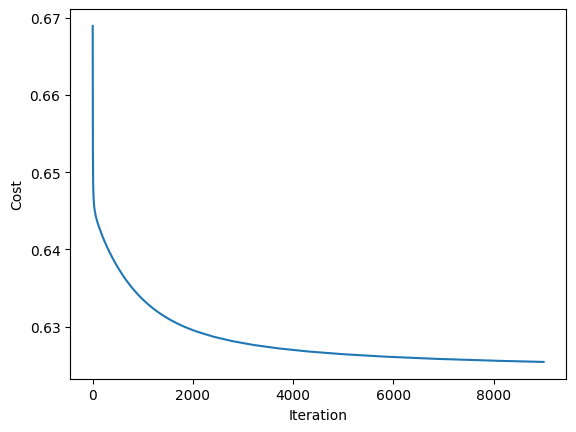

In [611]:
plt.plot([i for i in range(len(costs))], costs)
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.show()

In [570]:
import random

def get_batches(X, length, start):
    return X[start:length+start]

def gradient_mini_batch(LR: LogisticRegress, iterations, batch=25):
    
    m, n = LR.get_X().shape
    
    X_mat = LR.get_X().to_numpy()
    Y_mat = LR.get_Y().to_numpy()
    
    costs = []
    tempcost = []
    iters = []
    for i in range(iterations):
        index = np.random.permutation(m)
        sample_x = X_mat[index]
        sample_y = Y_mat[index]
        
        for batches in range(0, m, batch):
            
            x_batches = get_batches(X_mat, batch, batches)
            y_batches = get_batches(Y_mat, batch, batches)
                  
            linear =  LR.sigmoid(np.dot(LR.get_weight(), x_batches.T) + LR.get_bias())
            #print(linear)
            cost = -1.0/m * np.sum(y_batches * np.log(linear) + (1.0-y_batches) * (np.log(1.0-linear)))
            #cost = np.mean(np.square(y_batches-linear))
            tempcost.append(cost)
            
            dw = np.dot(x_batches.T, linear-y_batches)/n
            db = np.sum(linear-y_batches)/n

            LR.set_weight(LR.get_weight()-(LR.lr()*dw))
            LR.set_bias(LR.get_bias()-(LR.lr()*db))
            
        
        if i%10 == 0:
           # print(costs)
            costs.append(cost)
            iters.append(i)
            
    #return cost_list, epoch_list
    return costs, iters
    
    

In [596]:
LogistRegss = LogisticRegress(X1, Y1)
LogistRegss.set_lr(5.0e-11)

costs, epochs = gradient_mini_batch(LogistRegss, 1000)
predict = LogistRegss.make_prediction(X2)

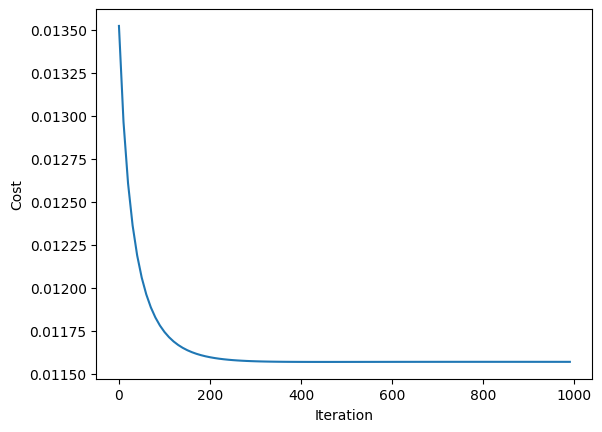

In [597]:
from matplotlib import pyplot as plt
plt.plot(epochs, costs)
#print(costs)
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.show()

In [598]:
print(np.sum(Y2 == predict)/len(Y2))

0.6883116883116883


__Task 4 (35 points): Pick any 2 optimization algorithms that are used to optimize the ‘vanilla’ gradient descent. Implement both. You may implement these algorithms yourself OR use a package. In your conclusion, compare both optimization techniques/algorithms with respect to the results you achieve. Also compare these results with the original implementation of gradient descent (Task 3 above). Describe why or why not should we use optimization algorithms for the task at hand.__

In [615]:
!pip install tensorflow

     |████████████████████████████████| 578.1 MB 11 kB/s s eta 0:00:01    |███▋                            | 64.6 MB 12.6 MB/s eta 0:00:41     |███▉                            | 69.1 MB 12.6 MB/s eta 0:00:41     |█████████████████▎              | 312.9 MB 48.9 MB/s eta 0:00:06     |██████████████████████▏         | 401.0 MB 1.8 MB/s eta 0:01:38     |██████████████████████▋         | 408.1 MB 1.8 MB/s eta 0:01:34     |████████████████████████▌       | 443.6 MB 21.9 MB/s eta 0:00:07
     |████████████████████████████████| 1.7 MB 20.8 MB/s eta 0:00:01
     |████████████████████████████████| 1.1 MB 16.8 MB/s eta 0:00:01
     |████████████████████████████████| 4.6 MB 11.0 MB/s eta 0:00:01
     |████████████████████████████████| 5.9 MB 16.1 MB/s eta 0:00:01
     |████████████████████████████████| 57 kB 6.1 MB/s  eta 0:00:01
     |████████████████████████████████| 438 kB 13.2 MB/s eta 0:00:01
     |████████████████████████████████| 2.4 MB 22.1 MB/s eta 0:00:01
     |██████████████████████████

In [626]:
!pip install keras

In [633]:
import tensorflow as tf
import os
os.environ['KMP_DUPLICATE_LIB_OK'] = 'TRUE'

def gradient_vectorization_adam(LR: LogisticRegress, iterations):
    m, n = LR.get_X().shape
    
    costs = []
    tempcost = []
    
    opt = tf
    
    for i in range(iterations):
        
        log_model = LR.sigmoid(np.dot(LR.get_X(), LR.get_weight()) + LR.b)

        cost= -1.0/m * np.sum(LR.get_Y() * np.log(log_model) + (1.0-LR.get_Y()) * (np.log(1.0-log_model)))
        
        
        deriv_w = np.dot(LR.get_X().T, log_model-LR.get_Y())/n
        deriv_b = np.sum(log_model-LR.get_Y())/n
        
        LR.set_weight(LR.get_weight()-(LR.lr()*deriv_w))
        LR.set_bias(LR.get_bias()-(LR.lr()*deriv_b))
        tempcost.append(cost)
        
        opt = tf.keras.optimizers.Adam(learning_rate=LR.lr())
        LR.set_lr(tf.keras.optimizers.Adam(learning_rate=LR.lr()))
        print(LR.lr())

        if i % 10:
            costs.append(sum(tempcost)/len(tempcost))
            
    
    return costs


In [634]:
LogistReg = LogisticRegress(X1, Y1)

In [635]:
costs = gradient_vectorization_adam(LogistReg, 10000)

TypeError: unsupported operand type(s) for *: 'Adam' and 'float'